# Time alloted: 20 min

# Motivation

Our idea behind this exercise is to offer you an opportunity to understand hands-on teh difficulties that arise in applying traditional ML algorithms to "natural" datasets

## The Problem

The problem is to give out a label  for a hand-written image of what's supposed to be a number from 0-9




# Load MNIST dataset

In [111]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import RandomForestClassifier
from random import randint
mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split


# Questions
- How many images does the dataset contain?
- How many pixels does each image have?

# Visualize data

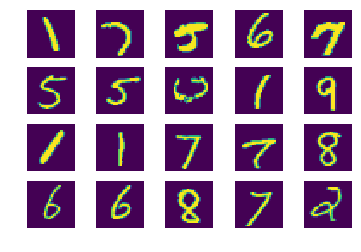

In [112]:
# Raw images are 1d arrays. plt.imshow requires 2D arrays for grayscale images
X_img=[]
for ele in mnist.data:
    X_img.append(ele.reshape(28,28))

for i in range(20):
    plt.subplot(4, 5, i+1)
    
    plt.axis('off')
    
    plt.imshow(X_img[randint(0, len(X_img))])


plt.show()


# Train-test split

In [113]:
# Map the grayscale intensities from [0,255]-> [0,1]
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]





# Run your favorite ML algorithm

# RandomForest Classifier
Let's first see how a classical technique like RF performs for this image dataset

In [130]:
rf_clf= RandomForestClassifier(n_estimators=1000,max_depth=20, verbose=0, n_jobs=-1)
rf_clf.fit(X_train, y_train)
print("Training set score: %f" % rf_clf.score(X_train, y_train))
print("Test set score: %f" % rf_clf.score(X_test, y_test))

Training set score: 0.999350
Test set score: 0.971100


# Ponder this:
1. The train error is low but the test error is relatrively high-why?
2. What will happen if you increase max_depth? if you decrease it?
2. What's the right way to generate features?
3. The image has a 2D structure how do you incorporate that in the RF algorithm?

# Feedforward NN

In [128]:

mlp = MLPClassifier(hidden_layer_sizes=(100,200,100), max_iter=30, alpha=1e-4,
                    solver='sgd', verbose=1, tol=1e-2, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


Iteration 1, loss = 0.29760641
Iteration 2, loss = 0.10449815
Iteration 3, loss = 0.07548644
Iteration 4, loss = 0.05770847
Iteration 5, loss = 0.04734471
Iteration 6, loss = 0.04071890
Iteration 7, loss = 0.03192422
Iteration 8, loss = 0.02881373
Training loss did not improve more than tol=0.010000 for two consecutive epochs. Stopping.
Training set score: 0.992900
Test set score: 0.975100
